In [ ]:
# Copyright (C) 2021 Nancy Yuk-Yu IP, The Hong Kong University of Science and Technology boip@ust.hk

# This program is free software: you can redistribute it and/or modify it under the terms 
# of the GNU General Public License as published by the Free Software Foundation, either 
# version 3 of the License, or (at your option) any later version.

# This program is distributed in the hope that it will be useful, but WITHOUT ANY WARRANTY; 
# without even the implied warranty of MERCHANTABILITY or FITNESS FOR A PARTICULAR PURPOSE. 
# See the GNU General Public License for more details.

# You should have received a copy of the GNU General Public License along with this program. 
# If not, see <http://www.gnu.org/licenses/>


In [48]:
# Check the working path

import os
import sys

#sys.path.append(os.path.expanduser('~')+"/miniconda3/lib/python3.8/site-packages")
CWD=os.getcwd()

print("Current working directory: {0}".format(CWD))


Current working directory: /mnt/f/WGS_Paper/Draft/Package/Final


In [49]:
# Seed seed value
seed_value= 9999

# Set the `PYTHONHASHSEED`

import os
os.environ['PYTHONHASHSEED']=str(seed_value)

# Set the `python` built-in pseudo-random generator 

import random
random.seed(seed_value)

# Set the `numpy` pseudo-random generator 

import numpy as np
np.random.seed(seed_value)

# Set the `tensorflow` pseudo-random generator 

import tensorflow as tf
tf.random.set_seed(seed_value)

In [50]:
# Read the training file
# The column name for the outcome is "Phenotype"

import pandas

# Set number of variants

N_var=2861


train_data=pandas.read_table('train.txt',delim_whitespace=True)

train_X_col=train_data.columns[1:(N_var+1)]
train_X=train_data[train_X_col]
train_Y=train_data['Phenotype']

In [51]:
# Read the test file

test_data=pandas.read_table('test.txt',delim_whitespace=True)

test_X_col=test_data.columns[1:(N_var+1)]
test_X=test_data[test_X_col]
test_Y=test_data['Phenotype']

In [52]:
# NN model

from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras.layers import LSTM
from keras.layers import Embedding
from keras.regularizers import l1, l1_l2, l2

model = Sequential()


model.add(Dropout(0.3, input_shape=(N_var,)))

model.add(Dense(50, activation='sigmoid',
kernel_regularizer=l1(5e-5)))

model.add(Dropout(0.1))

model.add(Dense(20, activation='sigmoid',
kernel_regularizer=l1(5e-5)))

model.add(Dense(10, activation='sigmoid', ))

model.add(Dense(5, activation='sigmoid', ))

model.add(Dense(1, activation='sigmoid', ))

model.summary()



Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dropout_6 (Dropout)          (None, 2861)              0         
_________________________________________________________________
dense_15 (Dense)             (None, 50)                143100    
_________________________________________________________________
dropout_7 (Dropout)          (None, 50)                0         
_________________________________________________________________
dense_16 (Dense)             (None, 20)                1020      
_________________________________________________________________
dense_17 (Dense)             (None, 10)                210       
_________________________________________________________________
dense_18 (Dense)             (None, 5)                 55        
_________________________________________________________________
dense_19 (Dense)             (None, 1)                

In [53]:
# Compile the model for REGRESSION problem

# model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])




# Alternatively, can try the exponential decay model

initial_learning_rate = 0.3
lr_schedule = tf.keras.optimizers.schedules.ExponentialDecay(
    initial_learning_rate,
    decay_steps=100000,
    decay_rate=0.96,
    staircase=True)

model.compile(optimizer=tf.keras.optimizers.SGD(learning_rate=lr_schedule),
    loss='binary_crossentropy',
    metrics=['accuracy'])

In [54]:
# Fit the model on the dataset

history = model.fit(train_X.values, train_Y.values, epochs=1000, batch_size=256, shuffle=False, 
                    validation_data=(test_X.values, test_Y.values))

Epoch 1/1000
5/5 [==============================] - 0s 22ms/step - loss: 0.7746 - accuracy: 0.6190 - val_loss: 0.6721 - val_accuracy: 0.8027
Epoch 2/1000
5/5 [==============================] - 0s 6ms/step - loss: 0.7266 - accuracy: 0.7947 - val_loss: 0.6656 - val_accuracy: 0.8027
Epoch 3/1000
5/5 [==============================] - 0s 6ms/step - loss: 0.7310 - accuracy: 0.7947 - val_loss: 0.6677 - val_accuracy: 0.8027
Epoch 4/1000
5/5 [==============================] - 0s 6ms/step - loss: 0.7350 - accuracy: 0.7947 - val_loss: 0.6691 - val_accuracy: 0.8027
Epoch 5/1000
5/5 [==============================] - 0s 6ms/step - loss: 0.7365 - accuracy: 0.7947 - val_loss: 0.6694 - val_accuracy: 0.8027
Epoch 6/1000
5/5 [==============================] - 0s 6ms/step - loss: 0.7366 - accuracy: 0.7947 - val_loss: 0.6691 - val_accuracy: 0.8027
Epoch 7/1000
5/5 [==============================] - 0s 6ms/step - loss: 0.7360 - accuracy: 0.7947 - val_loss: 0.6686 - val_accuracy: 0.8027
Epoch 8/1000
5/5 [=

5/5 [==============================] - 0s 6ms/step - loss: 0.6167 - accuracy: 0.7947 - val_loss: 0.5591 - val_accuracy: 0.8027
Epoch 118/1000
5/5 [==============================] - 0s 6ms/step - loss: 0.6170 - accuracy: 0.7947 - val_loss: 0.5573 - val_accuracy: 0.8027
Epoch 119/1000
5/5 [==============================] - 0s 6ms/step - loss: 0.6137 - accuracy: 0.7947 - val_loss: 0.5556 - val_accuracy: 0.8027
Epoch 120/1000
5/5 [==============================] - 0s 6ms/step - loss: 0.6129 - accuracy: 0.7947 - val_loss: 0.5539 - val_accuracy: 0.8027
Epoch 121/1000
5/5 [==============================] - 0s 6ms/step - loss: 0.6121 - accuracy: 0.7947 - val_loss: 0.5522 - val_accuracy: 0.8027
Epoch 122/1000
5/5 [==============================] - 0s 6ms/step - loss: 0.6095 - accuracy: 0.7947 - val_loss: 0.5505 - val_accuracy: 0.8027
Epoch 123/1000
5/5 [==============================] - 0s 6ms/step - loss: 0.6070 - accuracy: 0.7947 - val_loss: 0.5486 - val_accuracy: 0.8027
Epoch 124/1000
5/5 [=

Epoch 175/1000
5/5 [==============================] - 0s 6ms/step - loss: 0.5475 - accuracy: 0.7843 - val_loss: 0.4905 - val_accuracy: 0.8027
Epoch 176/1000
5/5 [==============================] - 0s 6ms/step - loss: 0.5452 - accuracy: 0.7788 - val_loss: 0.4899 - val_accuracy: 0.8027
Epoch 177/1000
5/5 [==============================] - 0s 6ms/step - loss: 0.5410 - accuracy: 0.7764 - val_loss: 0.4887 - val_accuracy: 0.8027
Epoch 178/1000
5/5 [==============================] - 0s 6ms/step - loss: 0.5387 - accuracy: 0.7732 - val_loss: 0.4880 - val_accuracy: 0.8027
Epoch 179/1000
5/5 [==============================] - 0s 6ms/step - loss: 0.5435 - accuracy: 0.7724 - val_loss: 0.4871 - val_accuracy: 0.8027
Epoch 180/1000
5/5 [==============================] - 0s 6ms/step - loss: 0.5372 - accuracy: 0.7748 - val_loss: 0.4866 - val_accuracy: 0.8027
Epoch 181/1000
5/5 [==============================] - 0s 6ms/step - loss: 0.5399 - accuracy: 0.7724 - val_loss: 0.4852 - val_accuracy: 0.8027
Epoch 

Epoch 233/1000
5/5 [==============================] - 0s 6ms/step - loss: 0.4982 - accuracy: 0.7460 - val_loss: 0.4510 - val_accuracy: 0.8027
Epoch 234/1000
5/5 [==============================] - 0s 6ms/step - loss: 0.5034 - accuracy: 0.7468 - val_loss: 0.4497 - val_accuracy: 0.8027
Epoch 235/1000
5/5 [==============================] - 0s 6ms/step - loss: 0.4989 - accuracy: 0.7396 - val_loss: 0.4504 - val_accuracy: 0.8027
Epoch 236/1000
5/5 [==============================] - 0s 6ms/step - loss: 0.5033 - accuracy: 0.7452 - val_loss: 0.4494 - val_accuracy: 0.8027
Epoch 237/1000
5/5 [==============================] - 0s 6ms/step - loss: 0.4931 - accuracy: 0.7460 - val_loss: 0.4487 - val_accuracy: 0.8027
Epoch 238/1000
5/5 [==============================] - 0s 6ms/step - loss: 0.4958 - accuracy: 0.7468 - val_loss: 0.4477 - val_accuracy: 0.8067
Epoch 239/1000
5/5 [==============================] - 0s 6ms/step - loss: 0.4935 - accuracy: 0.7548 - val_loss: 0.4473 - val_accuracy: 0.8091
Epoch 

Epoch 291/1000
5/5 [==============================] - 0s 6ms/step - loss: 0.4707 - accuracy: 0.8115 - val_loss: 0.4244 - val_accuracy: 0.8642
Epoch 292/1000
5/5 [==============================] - 0s 6ms/step - loss: 0.4584 - accuracy: 0.8171 - val_loss: 0.4244 - val_accuracy: 0.8610
Epoch 293/1000
5/5 [==============================] - 0s 6ms/step - loss: 0.4648 - accuracy: 0.8091 - val_loss: 0.4234 - val_accuracy: 0.8682
Epoch 294/1000
5/5 [==============================] - 0s 6ms/step - loss: 0.4635 - accuracy: 0.8123 - val_loss: 0.4227 - val_accuracy: 0.8666
Epoch 295/1000
5/5 [==============================] - 0s 6ms/step - loss: 0.4664 - accuracy: 0.8203 - val_loss: 0.4226 - val_accuracy: 0.8634
Epoch 296/1000
5/5 [==============================] - 0s 6ms/step - loss: 0.4676 - accuracy: 0.8059 - val_loss: 0.4223 - val_accuracy: 0.8666
Epoch 297/1000
5/5 [==============================] - 0s 6ms/step - loss: 0.4622 - accuracy: 0.8179 - val_loss: 0.4229 - val_accuracy: 0.8618
Epoch 

Epoch 349/1000
5/5 [==============================] - 0s 6ms/step - loss: 0.4431 - accuracy: 0.8307 - val_loss: 0.4053 - val_accuracy: 0.8690
Epoch 350/1000
5/5 [==============================] - 0s 6ms/step - loss: 0.4406 - accuracy: 0.8283 - val_loss: 0.4050 - val_accuracy: 0.8690
Epoch 351/1000
5/5 [==============================] - 0s 6ms/step - loss: 0.4419 - accuracy: 0.8315 - val_loss: 0.4056 - val_accuracy: 0.8690
Epoch 352/1000
5/5 [==============================] - 0s 6ms/step - loss: 0.4440 - accuracy: 0.8171 - val_loss: 0.4057 - val_accuracy: 0.8698
Epoch 353/1000
5/5 [==============================] - 0s 6ms/step - loss: 0.4401 - accuracy: 0.8259 - val_loss: 0.4048 - val_accuracy: 0.8698
Epoch 354/1000
5/5 [==============================] - 0s 6ms/step - loss: 0.4373 - accuracy: 0.8331 - val_loss: 0.4050 - val_accuracy: 0.8706
Epoch 355/1000
5/5 [==============================] - 0s 6ms/step - loss: 0.4408 - accuracy: 0.8307 - val_loss: 0.4042 - val_accuracy: 0.8682
Epoch 

Epoch 407/1000
5/5 [==============================] - 0s 6ms/step - loss: 0.4244 - accuracy: 0.8387 - val_loss: 0.3928 - val_accuracy: 0.8754
Epoch 408/1000
5/5 [==============================] - 0s 6ms/step - loss: 0.4210 - accuracy: 0.8442 - val_loss: 0.3896 - val_accuracy: 0.8754
Epoch 409/1000
5/5 [==============================] - 0s 6ms/step - loss: 0.4089 - accuracy: 0.8506 - val_loss: 0.3909 - val_accuracy: 0.8754
Epoch 410/1000
5/5 [==============================] - 0s 6ms/step - loss: 0.4217 - accuracy: 0.8411 - val_loss: 0.3907 - val_accuracy: 0.8746
Epoch 411/1000
5/5 [==============================] - 0s 6ms/step - loss: 0.4195 - accuracy: 0.8419 - val_loss: 0.3889 - val_accuracy: 0.8746
Epoch 412/1000
5/5 [==============================] - 0s 6ms/step - loss: 0.4105 - accuracy: 0.8506 - val_loss: 0.3886 - val_accuracy: 0.8754
Epoch 413/1000
5/5 [==============================] - 0s 6ms/step - loss: 0.4173 - accuracy: 0.8403 - val_loss: 0.3898 - val_accuracy: 0.8746
Epoch 

Epoch 465/1000
5/5 [==============================] - 0s 6ms/step - loss: 0.3963 - accuracy: 0.8586 - val_loss: 0.3820 - val_accuracy: 0.8770
Epoch 466/1000
5/5 [==============================] - 0s 6ms/step - loss: 0.3928 - accuracy: 0.8610 - val_loss: 0.3814 - val_accuracy: 0.8778
Epoch 467/1000
5/5 [==============================] - 0s 6ms/step - loss: 0.3946 - accuracy: 0.8586 - val_loss: 0.3820 - val_accuracy: 0.8762
Epoch 468/1000
5/5 [==============================] - 0s 6ms/step - loss: 0.3956 - accuracy: 0.8594 - val_loss: 0.3819 - val_accuracy: 0.8770
Epoch 469/1000
5/5 [==============================] - 0s 6ms/step - loss: 0.4053 - accuracy: 0.8562 - val_loss: 0.3807 - val_accuracy: 0.8786
Epoch 470/1000
5/5 [==============================] - 0s 6ms/step - loss: 0.3875 - accuracy: 0.8690 - val_loss: 0.3788 - val_accuracy: 0.8818
Epoch 471/1000
5/5 [==============================] - 0s 6ms/step - loss: 0.3828 - accuracy: 0.8642 - val_loss: 0.3791 - val_accuracy: 0.8818
Epoch 

Epoch 523/1000
5/5 [==============================] - 0s 6ms/step - loss: 0.3726 - accuracy: 0.8746 - val_loss: 0.3729 - val_accuracy: 0.8858
Epoch 524/1000
5/5 [==============================] - 0s 6ms/step - loss: 0.3843 - accuracy: 0.8674 - val_loss: 0.3740 - val_accuracy: 0.8826
Epoch 525/1000
5/5 [==============================] - 0s 6ms/step - loss: 0.3679 - accuracy: 0.8818 - val_loss: 0.3721 - val_accuracy: 0.8834
Epoch 526/1000
5/5 [==============================] - 0s 6ms/step - loss: 0.3734 - accuracy: 0.8714 - val_loss: 0.3750 - val_accuracy: 0.8810
Epoch 527/1000
5/5 [==============================] - 0s 6ms/step - loss: 0.3779 - accuracy: 0.8754 - val_loss: 0.3766 - val_accuracy: 0.8842
Epoch 528/1000
5/5 [==============================] - 0s 6ms/step - loss: 0.3798 - accuracy: 0.8770 - val_loss: 0.3745 - val_accuracy: 0.8834
Epoch 529/1000
5/5 [==============================] - 0s 6ms/step - loss: 0.3835 - accuracy: 0.8674 - val_loss: 0.3731 - val_accuracy: 0.8810
Epoch 

Epoch 581/1000
5/5 [==============================] - 0s 6ms/step - loss: 0.3620 - accuracy: 0.8834 - val_loss: 0.3696 - val_accuracy: 0.8866
Epoch 582/1000
5/5 [==============================] - 0s 6ms/step - loss: 0.3712 - accuracy: 0.8762 - val_loss: 0.3716 - val_accuracy: 0.8826
Epoch 583/1000
5/5 [==============================] - 0s 6ms/step - loss: 0.3689 - accuracy: 0.8698 - val_loss: 0.3675 - val_accuracy: 0.8882
Epoch 584/1000
5/5 [==============================] - 0s 6ms/step - loss: 0.3557 - accuracy: 0.8818 - val_loss: 0.3689 - val_accuracy: 0.8866
Epoch 585/1000
5/5 [==============================] - 0s 6ms/step - loss: 0.3627 - accuracy: 0.8802 - val_loss: 0.3727 - val_accuracy: 0.8826
Epoch 586/1000
5/5 [==============================] - 0s 6ms/step - loss: 0.3556 - accuracy: 0.8842 - val_loss: 0.3683 - val_accuracy: 0.8874
Epoch 587/1000
5/5 [==============================] - 0s 6ms/step - loss: 0.3596 - accuracy: 0.8882 - val_loss: 0.3724 - val_accuracy: 0.8826
Epoch 

Epoch 639/1000
5/5 [==============================] - 0s 6ms/step - loss: 0.3418 - accuracy: 0.8826 - val_loss: 0.3670 - val_accuracy: 0.8914
Epoch 640/1000
5/5 [==============================] - 0s 6ms/step - loss: 0.3572 - accuracy: 0.8810 - val_loss: 0.3724 - val_accuracy: 0.8890
Epoch 641/1000
5/5 [==============================] - 0s 6ms/step - loss: 0.3491 - accuracy: 0.8890 - val_loss: 0.3696 - val_accuracy: 0.8906
Epoch 642/1000
5/5 [==============================] - 0s 6ms/step - loss: 0.3435 - accuracy: 0.8866 - val_loss: 0.3632 - val_accuracy: 0.8922
Epoch 643/1000
5/5 [==============================] - 0s 6ms/step - loss: 0.3377 - accuracy: 0.8938 - val_loss: 0.3663 - val_accuracy: 0.8914
Epoch 644/1000
5/5 [==============================] - 0s 6ms/step - loss: 0.3474 - accuracy: 0.8898 - val_loss: 0.3697 - val_accuracy: 0.8882
Epoch 645/1000
5/5 [==============================] - 0s 6ms/step - loss: 0.3499 - accuracy: 0.8818 - val_loss: 0.3648 - val_accuracy: 0.8914
Epoch 

Epoch 697/1000
5/5 [==============================] - 0s 6ms/step - loss: 0.3349 - accuracy: 0.8970 - val_loss: 0.3697 - val_accuracy: 0.8898
Epoch 698/1000
5/5 [==============================] - 0s 6ms/step - loss: 0.3502 - accuracy: 0.8818 - val_loss: 0.3708 - val_accuracy: 0.8914
Epoch 699/1000
5/5 [==============================] - 0s 6ms/step - loss: 0.3273 - accuracy: 0.8962 - val_loss: 0.3690 - val_accuracy: 0.8906
Epoch 700/1000
5/5 [==============================] - 0s 6ms/step - loss: 0.3325 - accuracy: 0.8994 - val_loss: 0.3656 - val_accuracy: 0.8922
Epoch 701/1000
5/5 [==============================] - 0s 6ms/step - loss: 0.3269 - accuracy: 0.8938 - val_loss: 0.3644 - val_accuracy: 0.8922
Epoch 702/1000
5/5 [==============================] - 0s 6ms/step - loss: 0.3269 - accuracy: 0.8954 - val_loss: 0.3657 - val_accuracy: 0.8922
Epoch 703/1000
5/5 [==============================] - 0s 6ms/step - loss: 0.3400 - accuracy: 0.8898 - val_loss: 0.3683 - val_accuracy: 0.8922
Epoch 

Epoch 755/1000
5/5 [==============================] - 0s 6ms/step - loss: 0.3270 - accuracy: 0.8994 - val_loss: 0.3662 - val_accuracy: 0.8954
Epoch 756/1000
5/5 [==============================] - 0s 6ms/step - loss: 0.3311 - accuracy: 0.8978 - val_loss: 0.3698 - val_accuracy: 0.8938
Epoch 757/1000
5/5 [==============================] - 0s 6ms/step - loss: 0.3423 - accuracy: 0.8898 - val_loss: 0.3677 - val_accuracy: 0.8954
Epoch 758/1000
5/5 [==============================] - 0s 6ms/step - loss: 0.3295 - accuracy: 0.8938 - val_loss: 0.3665 - val_accuracy: 0.8930
Epoch 759/1000
5/5 [==============================] - 0s 6ms/step - loss: 0.3338 - accuracy: 0.8898 - val_loss: 0.3692 - val_accuracy: 0.8922
Epoch 760/1000
5/5 [==============================] - 0s 6ms/step - loss: 0.3281 - accuracy: 0.8946 - val_loss: 0.3691 - val_accuracy: 0.8922
Epoch 761/1000
5/5 [==============================] - 0s 6ms/step - loss: 0.3357 - accuracy: 0.8930 - val_loss: 0.3710 - val_accuracy: 0.8906
Epoch 

Epoch 813/1000
5/5 [==============================] - 0s 6ms/step - loss: 0.3155 - accuracy: 0.9034 - val_loss: 0.3695 - val_accuracy: 0.8946
Epoch 814/1000
5/5 [==============================] - 0s 6ms/step - loss: 0.3165 - accuracy: 0.8970 - val_loss: 0.3739 - val_accuracy: 0.8922
Epoch 815/1000
5/5 [==============================] - 0s 6ms/step - loss: 0.3325 - accuracy: 0.8906 - val_loss: 0.3717 - val_accuracy: 0.8954
Epoch 816/1000
5/5 [==============================] - 0s 6ms/step - loss: 0.3272 - accuracy: 0.8946 - val_loss: 0.3666 - val_accuracy: 0.8954
Epoch 817/1000
5/5 [==============================] - 0s 6ms/step - loss: 0.3055 - accuracy: 0.9065 - val_loss: 0.3639 - val_accuracy: 0.8970
Epoch 818/1000
5/5 [==============================] - 0s 6ms/step - loss: 0.3040 - accuracy: 0.9105 - val_loss: 0.3667 - val_accuracy: 0.8954
Epoch 819/1000
5/5 [==============================] - 0s 6ms/step - loss: 0.3230 - accuracy: 0.8978 - val_loss: 0.3667 - val_accuracy: 0.8954
Epoch 

Epoch 871/1000
5/5 [==============================] - 0s 6ms/step - loss: 0.3003 - accuracy: 0.9145 - val_loss: 0.3701 - val_accuracy: 0.8962
Epoch 872/1000
5/5 [==============================] - 0s 6ms/step - loss: 0.2956 - accuracy: 0.9105 - val_loss: 0.3776 - val_accuracy: 0.8938
Epoch 873/1000
5/5 [==============================] - 0s 6ms/step - loss: 0.3221 - accuracy: 0.9050 - val_loss: 0.3695 - val_accuracy: 0.8954
Epoch 874/1000
5/5 [==============================] - 0s 6ms/step - loss: 0.2959 - accuracy: 0.9097 - val_loss: 0.3677 - val_accuracy: 0.8954
Epoch 875/1000
5/5 [==============================] - 0s 6ms/step - loss: 0.3084 - accuracy: 0.9042 - val_loss: 0.3697 - val_accuracy: 0.8978
Epoch 876/1000
5/5 [==============================] - 0s 6ms/step - loss: 0.3109 - accuracy: 0.9042 - val_loss: 0.3773 - val_accuracy: 0.8930
Epoch 877/1000
5/5 [==============================] - 0s 6ms/step - loss: 0.3157 - accuracy: 0.9010 - val_loss: 0.3742 - val_accuracy: 0.8938
Epoch 

Epoch 929/1000
5/5 [==============================] - 0s 6ms/step - loss: 0.3027 - accuracy: 0.9089 - val_loss: 0.3755 - val_accuracy: 0.8930
Epoch 930/1000
5/5 [==============================] - 0s 6ms/step - loss: 0.3152 - accuracy: 0.9042 - val_loss: 0.3764 - val_accuracy: 0.8914
Epoch 931/1000
5/5 [==============================] - 0s 6ms/step - loss: 0.3106 - accuracy: 0.9058 - val_loss: 0.3677 - val_accuracy: 0.8946
Epoch 932/1000
5/5 [==============================] - 0s 6ms/step - loss: 0.2981 - accuracy: 0.9129 - val_loss: 0.3657 - val_accuracy: 0.8954
Epoch 933/1000
5/5 [==============================] - 0s 6ms/step - loss: 0.2828 - accuracy: 0.9257 - val_loss: 0.3742 - val_accuracy: 0.8938
Epoch 934/1000
5/5 [==============================] - 0s 6ms/step - loss: 0.3328 - accuracy: 0.8946 - val_loss: 0.3799 - val_accuracy: 0.8922
Epoch 935/1000
5/5 [==============================] - 0s 6ms/step - loss: 0.3172 - accuracy: 0.8994 - val_loss: 0.3730 - val_accuracy: 0.8938
Epoch 

Epoch 987/1000
5/5 [==============================] - 0s 6ms/step - loss: 0.2969 - accuracy: 0.9153 - val_loss: 0.3679 - val_accuracy: 0.8914
Epoch 988/1000
5/5 [==============================] - 0s 6ms/step - loss: 0.2871 - accuracy: 0.9217 - val_loss: 0.3665 - val_accuracy: 0.8946
Epoch 989/1000
5/5 [==============================] - 0s 6ms/step - loss: 0.2916 - accuracy: 0.9177 - val_loss: 0.3777 - val_accuracy: 0.8922
Epoch 990/1000
5/5 [==============================] - 0s 6ms/step - loss: 0.3210 - accuracy: 0.9018 - val_loss: 0.3705 - val_accuracy: 0.8930
Epoch 991/1000
5/5 [==============================] - 0s 6ms/step - loss: 0.2946 - accuracy: 0.9169 - val_loss: 0.3721 - val_accuracy: 0.8898
Epoch 992/1000
5/5 [==============================] - 0s 6ms/step - loss: 0.2846 - accuracy: 0.9169 - val_loss: 0.3711 - val_accuracy: 0.8930
Epoch 993/1000
5/5 [==============================] - 0s 6ms/step - loss: 0.3028 - accuracy: 0.9081 - val_loss: 0.3771 - val_accuracy: 0.8914
Epoch 

In [55]:
# Final accuracy in training data

_, accuracy = model.evaluate(train_X, train_Y)
print('Accuracy: %.2f' % (accuracy*100))

40/40 [==============================] - 0s 530us/step - loss: 0.2328 - accuracy: 0.9409
Accuracy: 94.09


In [56]:
# Final accuracy in test data

_, accuracy = model.evaluate(test_X, test_Y)
print('Accuracy: %.2f' % (accuracy*100))

40/40 [==============================] - 0s 541us/step - loss: 0.3669 - accuracy: 0.8938
Accuracy: 89.38


In [57]:
# Setting the plot function for visualize training and test accurary

import matplotlib.pyplot as plt
%matplotlib inline
%config InlineBackend.figure_format = 'svg'

def plot_metric(history, metric):
    train_metrics = history.history[metric]
    val_metrics = history.history['val_'+metric]
    epochs = range(1, len(train_metrics) + 1)
    plt.plot(epochs, train_metrics)
    plt.plot(epochs, val_metrics)
    plt.title('Train and Test '+ metric)
    plt.xlabel("Epochs")
    plt.ylabel(metric)
    plt.legend(["train_"+metric, 'val_'+metric])
    plt.show()


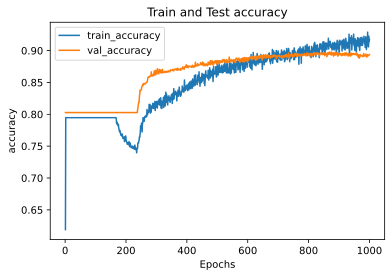

In [58]:
# Plot train and test accuracy

plot_metric(history, 'accuracy')

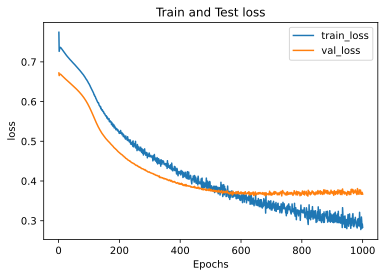

In [59]:
# Plot train and test loss

plot_metric(history, 'loss')

In [60]:
# Obtain the polygenic score

from keras import backend as K

get_last_layer_output = K.function([model.layers[0].input],[model.layers[6].output])

In [61]:
# Calculate AUC for training data

train_X_pred = get_last_layer_output([train_X.values])[0]

from sklearn import metrics

fpr, tpr, thresholds = metrics.roc_curve(train_Y, train_X_pred, pos_label=1)

metrics.auc(fpr, tpr)


0.9742956025262499

In [62]:
# Calculate AUC for test data

test_X_pred = get_last_layer_output([test_X.values])[0]

from sklearn import metrics

fpr, tpr, thresholds = metrics.roc_curve(test_Y, test_X_pred, pos_label=1)

metrics.auc(fpr, tpr)

0.9170423187705199

In [63]:
# Output the score to file

# Score for the training dataset

train_out=pandas.DataFrame(np.array(train_X_pred)[:,:],columns=['Score'])
train_out['FID']=train_data['FID']
train_out['Phenotype']=train_data['Phenotype']
train_out.to_csv('train_score.csv',index=False)

# Score for the test dataset

test_out=pandas.DataFrame(np.array(train_X_pred)[:,:],columns=['Score'])
test_out['FID']=train_data['FID']
test_out['Phenotype']=test_data['Phenotype']
test_out.to_csv('test_score.csv',index=False)

In [69]:
# Get the second last layer output

get_2ndLast_layer_output = K.function([model.layers[0].input],[model.layers[5].output])

# Scores for the training dataset
train_2ndLast_out = pandas.DataFrame(np.array(get_2ndLast_layer_output([train_X.values]))[0,:,:],
                                     columns=['Pred_Factor1','Pred_Factor2','Pred_Factor3','Pred_Factor4','Pred_Factor5'])
train_2ndLast_out['FID']=train_data['FID']
train_2ndLast_out['Phenotype']=train_data['Phenotype']
train_2ndLast_out.to_csv('train_2ndLast_score.csv',index=False)

# Scores for the test dataset
test_2ndLast_out = pandas.DataFrame(np.array(get_2ndLast_layer_output([test_X.values]))[0,:,:],
                                     columns=['Pred_Factor1','Pred_Factor2','Pred_Factor3','Pred_Factor4','Pred_Factor5'])
test_2ndLast_out['FID']=test_data['FID']
test_2ndLast_out['Phenotype']=test_data['Phenotype']
test_2ndLast_out.to_csv('test_2ndLast_score.csv',index=False)